# Setup

In [ ]:
%cd /content/drive/MyDrive/Dataset/rokomari_books/Rokomari Recommendation Dataset/Datasets

/content/drive/.shortcut-targets-by-id/1SdeIcOv6xY-c8y2UcMwPLYx_BaB0zdXx/Rokomari Recommendation Dataset/Datasets


In [ ]:
!ls

 corrected_language.csv       rokomari_book_data_v2.csv  'scraping log.txt'
'Data Analysis Report.gdoc'   rokomari_v2.csv		  wrong_language_url.txt
 rokomari_book_data.csv       rokomari_v2.ipynb


# Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# !python -m pip install -U pycld2

In [ ]:
# !pip install langdetect

In [ ]:
# import pycld2 as cld2
# import langdetect as ld

# Load data

In [ ]:
df = pd.read_csv("rokomari_book_data_v2.csv")

In [ ]:
df.head(5)

,book_id,title,author,publisher,publisher_name_english,categories,category_english,edition,isbn,summary,language,rating,n_ratings,n_reviews,price,offer_price,book_url,prod_img_link,availability,product_category
0,295805,Chinese Materia Medica,Xu Li,Donica Publishing;,Donica Publishing;,Others Medical Book,Others Medical Book,Edition,9781901149029,No summary,English,5.0,0,0,3591.0,3591.0,https://www.rokomari.com/book/295805/chinese-m...,https://img.cf.rokomari.com/ProductNew20190903...,Request for Stock,book
1,351135,Living Ramayanas,Azeez Tharuvana,Eka (India),Eka (India),Foreign Language Books: Religious Books,Foreign Language Books: Religious Books,10 October 2022,9789395073462,No summary,English,5.0,0,0,898.0,898.0,https://www.rokomari.com/book/351135/living-ra...,https://img.cf.rokomari.com/ProductNew20190903...,Request for Stock,book
2,350167,অমানুষিক,মনোরঞ্জন ব্যাপারী,একা,Eka (India),পশ্চিমবঙ্গের বই,West Bengal Books,6 March 2023,9789357762298,No summary,বাংলা,5.0,0,0,450.0,450.0,https://www.rokomari.com/book/350167/amanushik,https://img.cf.rokomari.com/ProductNew20190903...,Request For Reprint,book
3,383107,Prayer Wall,Kataleya Graceal,Dawnlight Publishing (India),Dawnlight Publishing (India),Foreign Language Books: Various Religious Books,Foreign Language Books: Various Religious Books,1st Published,9781991176882,No summary,English,5.0,0,0,6904.0,6904.0,https://www.rokomari.com/book/383107/prayer-wall,https://img.cf.rokomari.com/ProductNew20190903...,Request for Stock,book
4,287979,The Geology of Ireland,Charles Hepworth Holland,Dunedin Academic Press,Dunedin Academic Press,Department of Geology,Department of Geology,1st published 2001,9781903765074,No summary,English,5.0,0,0,27388.0,27388.0,https://www.rokomari.com/book/287979/the-geolo...,https://img.cf.rokomari.com/ProductNew20190903...,Request for Stock,book


In [ ]:
df.shape

(300067, 20)

In [ ]:
# def detect_language(row):
#     try:
#         lang = ld.detect(str(row))
#     except:
#         return 'unknown'
#     return lang

In [ ]:
# count the values of alll the languages
df['language'].value_counts().reset_index()

,language,count
0,বাংলা,200861
1,English,91751
2,Bangla & Arabic,2462
3,Arabic,1969
4,Bangla & English,1776
5,Urdu,611
6,"Arabic, Urdu",159
7,"Bangla, English, Arabic",134
8,"Bangla, Arabic, Urdu",130
9,Hindi,57


In [ ]:
# get how many rows with "No Language"
df.loc[df['language'] == 'No Language'] # only 6

,book_id,title,author,publisher,publisher_name_english,categories,category_english,edition,isbn,summary,language,rating,n_ratings,n_reviews,price,offer_price,book_url,prod_img_link,availability,product_category
9137,16294,গল্পগুলো পশুপাখির,আলী ইমাম,Mizan Publishers,Mizan Publishers,Story: Children and Teens,Story: Children and Teens,No Edition,No ISBN,No summary,No Language,5.00,0,0,100.0,83.0,https://www.rokomari.com/book/16294/golpoglu-p...,https://img.cf.rokomari.com/ProductNew20190903...,Request For Reprint,book
29420,76420,কাজের যত মোবাইল অ্যাপস,নুরুন্নবী চৌধুরী হাছিব,তাম্রলিপি,Tamrolipi,মোবাইল ফোন বিষয়ক,Mobile Phone,No Edition,No ISBN,। বর্তমানে সবার হাতেই রয়েছে দারুণ সব সুবিধার স...,No Language,4.57,7,2,135.0,108.0,https://www.rokomari.com/book/76420/kajer-joto...,https://img.cf.rokomari.com/ProductNew20190903...,Request For Reprint,book
29565,62905,বাংলা উইকিপিডিয়া কী এবং কেন,নুরুন্নবী চৌধুরী হাছিব,তাম্রলিপি,Tamrolipi,"গণিত, বিজ্ঞান ও প্রযুক্তিঃ বিবিধ","Math, Science & Technology: Others",No Edition,No ISBN,। আবহমান কাল থেকে মানব সমাজে জ্ঞানের চর্চাটা ছ...,No Language,4.91,11,3,120.0,96.0,https://www.rokomari.com/book/62905/bangla-wik...,https://img.cf.rokomari.com/ProductNew20190903...,Request For Reprint,book
48984,56160,হৃদরোগের কারণ ও প্রতিকার,ডা. মিজানুর রহমান কল্লোল,শিখা প্রকাশনী,Shikha Prokashoni,স্বাস্থ্যবিধি ও পরামর্শ,Health-Fitness and Prescriptions,No Edition,No ISBN,।হৃৎপিন্ড মূলত একটি শক্তিশালী পাম্প। এর প্রধান...,No Language,5.00,1,0,300.0,258.0,https://www.rokomari.com/book/56160/ridroger-k...,https://img.cf.rokomari.com/ProductNew20190903...,Request For Reprint,book
60760,64373,জয় মুক্তিযুদ্ধ,ফজল-এ-খোদা,Sahitto Bilash,Sahitto Bilash,History of Liberation War: From the Field of War,History of Liberation War: From the Field of War,No Edition,No ISBN,No summary,No Language,5.00,0,0,180.0,155.0,https://www.rokomari.com/book/64373/joy-muktij...,https://img.cf.rokomari.com/ProductNew20190903...,Request For Reprint,book
60800,64360,গল্পে ছড়ায় ঈশপ,হাসান হাফিজ,Sahitto Bilash,Sahitto Bilash,Children and Teens: Rhymes,Children and Teens: Rhymes,No Edition,No ISBN,No summary,No Language,5.00,0,0,150.0,129.0,https://www.rokomari.com/book/64360/golpe-chor...,https://img.cf.rokomari.com/ProductNew20190903...,Request For Reprint,book


* All the "No Language" rows seem in Bangla, let's conver them to "বাংলা"

In [ ]:
# convert all the "No Language" to "বাংলা"
df.loc[df['language'] == 'No Language', 'language'] = 'বাংলা'

In [ ]:
# Let's see the value counts of all the languages again
lang_count = df['language'].value_counts().reset_index()
lang_count

,language,count
0,বাংলা,200867
1,English,91751
2,Bangla & Arabic,2462
3,Arabic,1969
4,Bangla & English,1776
5,Urdu,611
6,"Arabic, Urdu",159
7,"Bangla, English, Arabic",134
8,"Bangla, Arabic, Urdu",130
9,Hindi,57


In [ ]:
lang_count.loc[lang_count['language'].str.contains('Bangla'), 'count'].sum()

4522

In [ ]:
df.loc[df['language'].str.contains('Bangla')].shape

(4522, 20)

* **4522** rows that have "Bangla" as one of the languages

> Let's compute the actual ratings

In [ ]:
# Function for computing the actual rating

def actual_ratings(row):
    """
    if n_ratings == 0 and rating == 5, then return 0
    else return rating
    """
    if (row['n_ratings'] == 0) and (row['rating'] == 5):
        return 0
    else:
        return row['rating']

df['actual_rating'] = df.apply(actual_ratings, axis=1) # apply

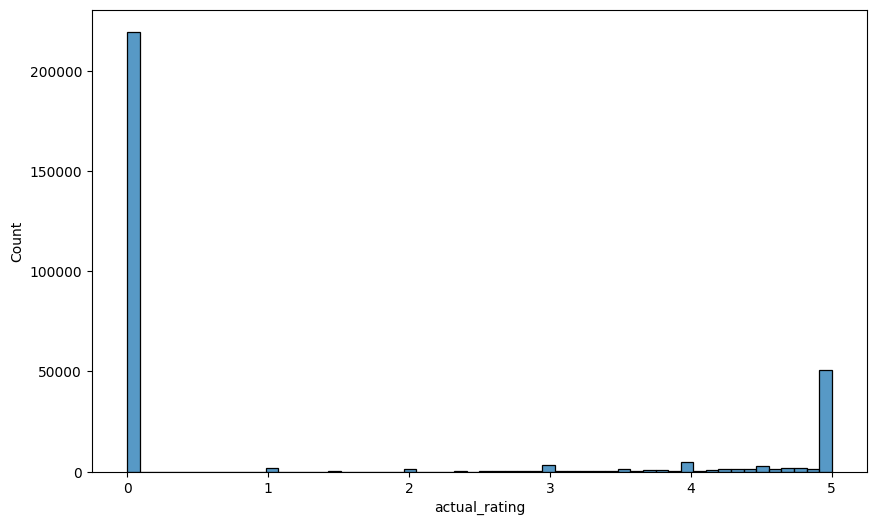

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['actual_rating'])
plt.show()

* There are just too many books with **0** ratings, like **2 lac+** out of **3 lac 67** books

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2476 (\N{BENGALI LETTER BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2434 (\N{BENGALI SIGN ANUSVARA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2482 (\N{BENGALI LETTER LA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


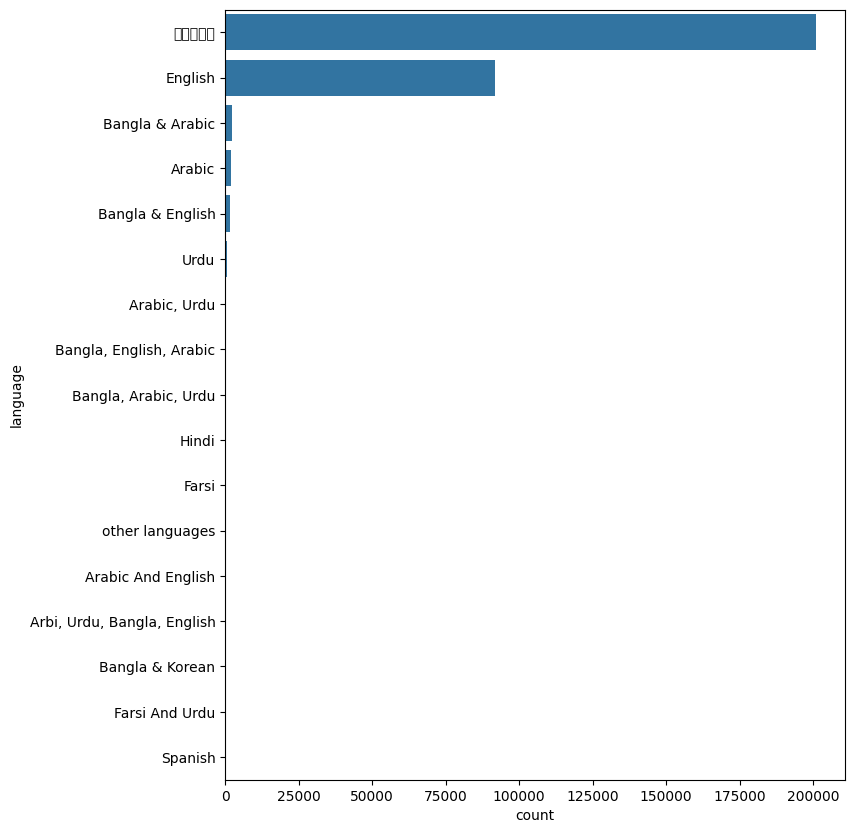

In [ ]:
plt.figure(figsize=(8, 10))
sns.countplot(df['language'], order=df['language'].value_counts().index) # The first one is "বাংলা"
plt.show()

## Save the data when you're done with modifying

In [ ]:
# overwriting the rokomari_book_data_v2.csv
df.to_csv("rokomari_book_data_v2.csv", index=False)

# Only Bangla books

In [ ]:
print(df.loc[(df['language'] == 'বাংলা') | df['language'].str.contains('Bangla')].shape)

# sanity check if the adding the two shapes matches the previous one
print(df.loc[df['language'] == 'বাংলা'].shape[0] + df.loc[df['language'].str.contains('Bangla')].shape[0])

(205389, 21)
205389


* the shape matches, so can make our "Only Bangla" dataset out of this

In [ ]:
df_bn = df.loc[(df['language'] == 'বাংলা') | df['language'].str.contains('Bangla')]

In [ ]:
df_bn.shape

(205389, 21)

## Now save the only bangla books dataframe

In [56]:
df_bn.to_csv("rokomari_books_only_bangla_v2.csv", index=False)

In [57]:
!ls

 corrected_language.csv       rokomari_book_data_v2.csv		  rokomari_v2.ipynb
'Data Analysis Report.gdoc'   rokomari_books_only_bangla_v2.csv  'scraping log.txt'
 rokomari_book_data.csv       rokomari_v2.csv			  wrong_language_url.txt
